# Выпускная квалификационная работа - 5 Написать нейронную сеть

1. Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

In [52]:
# import warnings; warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential      # последовательная модель
from tensorflow.keras.models import load_model
from tensorflow.keras        import layers
from tensorflow.keras.layers import Dense           # полносвязный слой
from tensorflow.keras.layers import Dropout


## Загузка данных

In [53]:
df = pd.read_excel('data/data_outliers_cleaned.xlsx', index_col=0)
df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [54]:
df.shape

(936, 13)

In [55]:
# Определим входы и выход для модели

target_var = df['Соотношение матрица-наполнитель']
train_vars = df.loc[:, df.columns != 'Соотношение матрица-наполнитель']

# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(train_vars, target_var, test_size=0.3, random_state=14)

In [56]:
# нормализация
# This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1.
#  It enables smoother gradients, faster training, and better generalization accuracy.
x_train_normalizer = tf.keras.layers.Normalization(axis=-1)
x_train_normalizer.adapt(np.array(x_train))

In [57]:
# Сконфигурируем модель, зададим слои
# In regression models, ‘relu’ is generally used in the hidden layers, 
# and ‘linear’ activation functions are used in the output layer, 
# if the regression is not logistic.

model = tf.keras.Sequential([
    x_train_normalizer, 
    
    layers.Dense((x_train.shape[1] * 16), activation='relu', name='Hidden-1'), 
    # layers.Dropout(0.2, input_shape=(2,), name='Dropout-1-.2'),
    layers.Dense((x_train.shape[1] * 4), activation='relu', name='Hidden-2'), 
    # layers.Dropout(0.2, input_shape=(2,), name='Dropout-2-.2'),
    layers.Dense(1, activation='linear', name='Output'),                                                  
])

#  The ‘mse’ loss function is usually in regression models.
# model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')
model.compile(optimizer='rmsprop' , loss='mean_squared_error' , metrics=['mae'])

In [58]:
# Архитектура модели

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 Hidden-1 (Dense)            (None, 192)               2496      
                                                                 
 Hidden-2 (Dense)            (None, 48)                9264      
                                                                 
 Output (Dense)              (None, 1)                 49        
                                                                 
Total params: 11,834
Trainable params: 11,809
Non-trainable params: 25
_________________________________________________________________


In [59]:
# Обучим модель

model_hist = model.fit(x_train, y_train, epochs=10, verbose=2, validation_split = 0.3)

Epoch 1/24
5/5 - 0s - loss: 5.8349 - mae: 2.2012 - val_loss: 2.6200 - val_mae: 1.3352 - 441ms/epoch - 88ms/step
Epoch 2/24
5/5 - 0s - loss: 1.8430 - mae: 1.1215 - val_loss: 1.3731 - val_mae: 0.9554 - 27ms/epoch - 5ms/step
Epoch 3/24
5/5 - 0s - loss: 1.0663 - mae: 0.8176 - val_loss: 1.2605 - val_mae: 0.9274 - 27ms/epoch - 5ms/step
Epoch 4/24
5/5 - 0s - loss: 0.9544 - mae: 0.7844 - val_loss: 1.2148 - val_mae: 0.9087 - 31ms/epoch - 6ms/step
Epoch 5/24
5/5 - 0s - loss: 0.9072 - mae: 0.7624 - val_loss: 1.2172 - val_mae: 0.9217 - 29ms/epoch - 6ms/step
Epoch 6/24
5/5 - 0s - loss: 0.8703 - mae: 0.7439 - val_loss: 1.2236 - val_mae: 0.9240 - 29ms/epoch - 6ms/step
Epoch 7/24
5/5 - 0s - loss: 0.8583 - mae: 0.7459 - val_loss: 1.2063 - val_mae: 0.9161 - 32ms/epoch - 6ms/step
Epoch 8/24
5/5 - 0s - loss: 0.8135 - mae: 0.7244 - val_loss: 1.1933 - val_mae: 0.9133 - 32ms/epoch - 6ms/step
Epoch 9/24
5/5 - 0s - loss: 0.7915 - mae: 0.7169 - val_loss: 1.1699 - val_mae: 0.9032 - 28ms/epoch - 6ms/step
Epoch 10

In [60]:
# Потери модели

model_hist.history

{'loss': [5.834859848022461,
  1.8430193662643433,
  1.0662916898727417,
  0.9544450044631958,
  0.9071648120880127,
  0.8703188300132751,
  0.8583096265792847,
  0.8134878873825073,
  0.791546106338501,
  0.7904150485992432,
  0.7453078031539917,
  0.7283533215522766,
  0.6950535178184509,
  0.6912550330162048,
  0.6758816838264465,
  0.6322894096374512,
  0.6333653330802917,
  0.6120852828025818,
  0.5869944095611572,
  0.5808134078979492,
  0.5535491108894348,
  0.5427541136741638,
  0.5509059429168701,
  0.5165596604347229],
 'mae': [2.2011923789978027,
  1.1214959621429443,
  0.8175638914108276,
  0.7844069004058838,
  0.7623841166496277,
  0.7438599467277527,
  0.7459055781364441,
  0.7244459390640259,
  0.7168624997138977,
  0.7170009016990662,
  0.6936638951301575,
  0.688351571559906,
  0.6734051704406738,
  0.6673105955123901,
  0.6598182320594788,
  0.6370362043380737,
  0.6423411965370178,
  0.6319915056228638,
  0.6167917251586914,
  0.6077011227607727,
  0.596368432044982

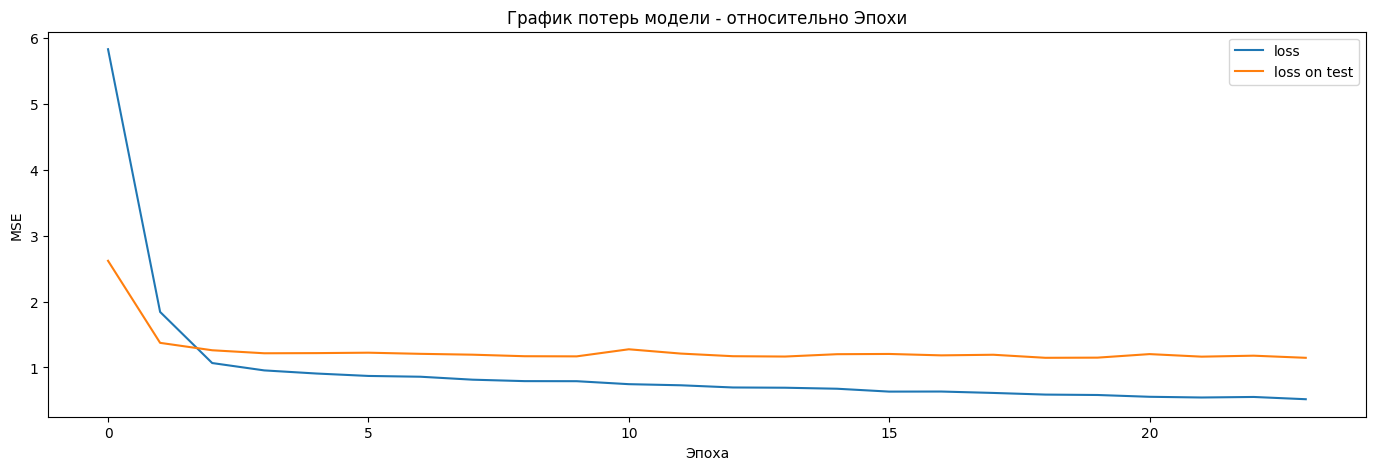

In [61]:
# Отрисовка потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize=(17,5))
    plt.plot(model_hist.history['loss'])
    plt.plot(model_hist.history['val_loss'])
    plt.title('График потерь модели - относительно Эпохи')
    plt.ylabel('MSE')
    plt.xlabel('Эпоха')
    plt.legend(['loss', 'loss on test'], loc='best')
    plt.show()
model_loss_plot(model_hist)

In [62]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей

def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label='Тест')
    plt.plot(predict, label='Прогноз')
    plt.legend(loc='best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()


9/9 [==============================] - 0s 1ms/step


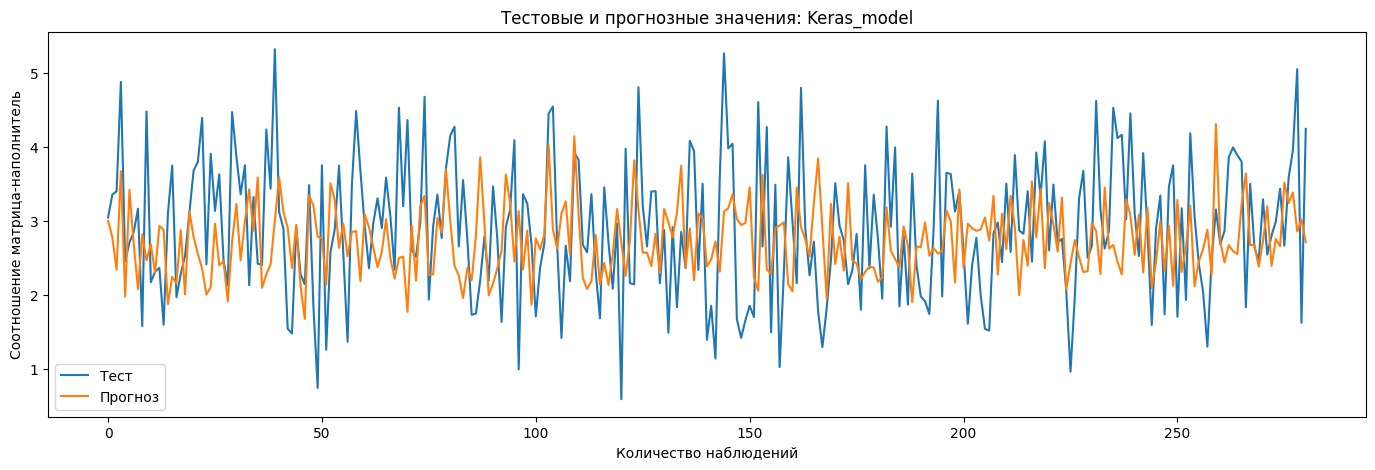

In [63]:
# Отрисуем результат работы модели

actual_and_predicted_plot(y_test.values, model.predict(x_test.values), 'Соотношение матрица-наполнитель', 'Keras_model')

In [64]:
# оценка модели MSE
mse_nn, mae_nn = model.evaluate(x_test, y_test, verbose=1)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

9/9 [==============================] - 0s 1ms/step - loss: 1.0587 - mae: 0.8419
Mean squared error on test data:  1.0586756467819214
Mean absolute error on test data:  0.8419492244720459


In [65]:
print(F'MSE: {mean_squared_error(y_test, model.predict(x_test.values)):.4f} , R2: {r2_score(y_test, model.predict(x_test.values)):.4f}')

9/9 [==============================] - 0s 699us/step
MSE: 1.0587 , R2: -0.2590


In [66]:
model.save('model/my_keras_model')

INFO:tensorflow:Assets written to: model/my_keras_model/assets


INFO:tensorflow:Assets written to: model/my_keras_model/assets


In [67]:

m = load_model('model/my_keras_model')
m.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 Hidden-1 (Dense)            (None, 192)               2496      
                                                                 
 Hidden-2 (Dense)            (None, 48)                9264      
                                                                 
 Output (Dense)              (None, 1)                 49        
                                                                 
Total params: 11,834
Trainable params: 11,809
Non-trainable params: 25
_________________________________________________________________


In [68]:
m.weights

[<tf.Variable 'mean:0' shape=(12,) dtype=float32, numpy=
 array([1973.0605   ,  741.70575  ,  111.28362  ,   22.206017 ,
         286.04895  ,  490.849    ,   73.33168  , 2470.2708   ,
         215.27907  ,   45.755722 ,    6.8643894,   57.48952  ],
       dtype=float32)>,
 <tf.Variable 'variance:0' shape=(12,) dtype=float32, numpy=
 array([5.0779165e+03, 1.0743080e+05, 7.4003314e+02, 6.0251102e+00,
        1.5916606e+03, 7.9864117e+04, 9.3165226e+00, 2.2316891e+05,
        3.5265742e+03, 2.0244287e+03, 6.1740403e+00, 1.2727345e+02],
       dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=655>,
 <tf.Variable 'Hidden-1/kernel:0' shape=(12, 192) dtype=float32, numpy=
 array([[-0.10745779, -0.00283376,  0.003969  , ..., -0.14082545,
         -0.06835145,  0.04809798],
        [-0.11285125, -0.00176332,  0.03723179, ...,  0.128378  ,
         -0.09010759, -0.09741451],
        [-0.14115101,  0.00320996,  0.03008294, ..., -0.09956099,
          0.10727707,  0.11023352],
